In [76]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml01cw2_helpers import *
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.cluster import KMeans

<b>3.1 (3 points)</b><br>
Apply k-means clustering on Xtrn for k = 22, where we use sklearn.cluster.KMeans with the parameters n_clusters=22 and random_state=1. Report the sum of squared distances of samples to their closest cluster centre, and the number of samples for each cluster.

In [74]:
#load the data
Xtrn,Ytrn,Xtst,Ytst = load_CoVoST2('../data')

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=22,random_state=1).fit(Xtrn)

In [4]:
kmeans.inertia_

38185.816951386696

In [5]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [6]:
sampleNum=[]
for i in range(0,22):
    sampleNum.append(ClusterIndicesNumpy(i,kmeans.labels_).shape[0])

In [7]:
np.array(sampleNum).T

array([1018, 1125, 1191,  890, 1162, 1332,  839,  623, 1400,  838,  659,
       1276,  121,  152,  950, 1971, 1251,  845,  896,  930, 1065, 1466])

<br>
<b>3.2 (3 points)</b><br>
Using the training set only, calculate the mean vector for each language, and plot the mean vectors of all the 22 languages on a 2D-PCA plane, where you apply PCA on the set of 22 mean vectors without applying standardisation. On the same figure, plot the cluster centres obtained in Question 3.1.
You should format the figure nicely so that language and cluster information is clear. Language information should be shown in terms of name, its abbreviation, or number. Are the mean vectors and cluster centres similar? Discuss your findings briefly.

In [8]:
# get mean vectors
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=1)
pca.fit(Xtrn)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# get entire training dataset with label
trn_final = np.column_stack((Xtrn,Ytrn))
df_trn = pd.DataFrame(trn_final)
lst=[]
mean_vec=[]
# get mean vectors of 26 classes
for i in range(0,22):
    lst.append(df_trn[df_trn[df_trn.columns[-1]]==i].drop([26],axis=1).values)
    mean_vec.append(lst[i].mean(axis=0))
    
mean_arr = np.array(mean_vec)
mean_arr.shape

(22, 26)

In [10]:
# use pca to train a 2d mean vectors 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_mean_vec=pca_2d.fit_transform(mean_arr)

# use pca to train kmeans cluster center
pca_kms= pca_2d.fit_transform(kmeans.cluster_centers_)

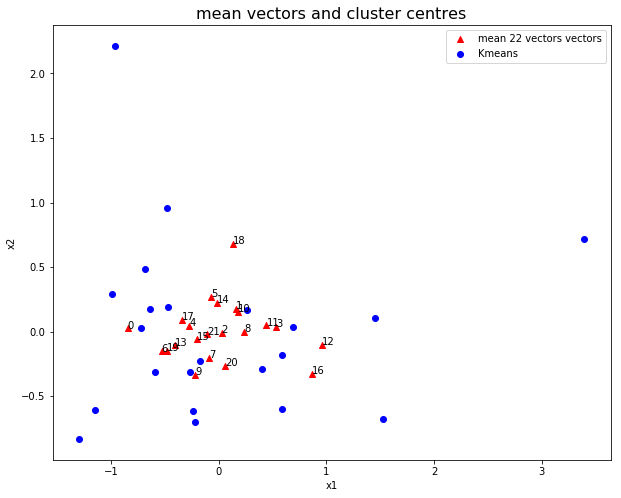

In [11]:
# plot 2d pca plane
plt.figure(figsize=(10,8))

x_mean=[row[0] for row in pca_mean_vec]
y_mean=[row[1] for row in pca_mean_vec]

# add language lable in plt
tem =0
for label in pca_mean_vec:
    plt.annotate(str(tem),label)
    tem += 1


plt.scatter(x=x_mean,
            y=y_mean,
            c='r',
            marker='^',
            label='mean 22 vectors vectors')


# # get centers of kmeans
x_km = [row[0] for row in pca_kms]
y_km = [row[1] for row in pca_kms]

plt.scatter(x=x_km,
            y=y_km,
            c='b',
            label='Kmeans')

plt.legend()
plt.title('mean vectors and cluster centres',fontsize=16)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<br>
<b>3.3 (3 points)</b><br>
We now apply hierarchical clustering on the training data set to see if there are any structures in the spoken languages.
To avoid the analysis being cluttered, we represent the data of each language by the mean vector for that language, so that we only use 22 mean vectors for this analysis instead of using all the data in the training set. Now, using scipy.cluster.hierarchy, carry out hierarchical clustering with the Ward’s linkage and display the dendrogram with an option of orientation=’right’. Provide appropriate labels to indicate the language of each leaf node.
<br>Discuss your findings.

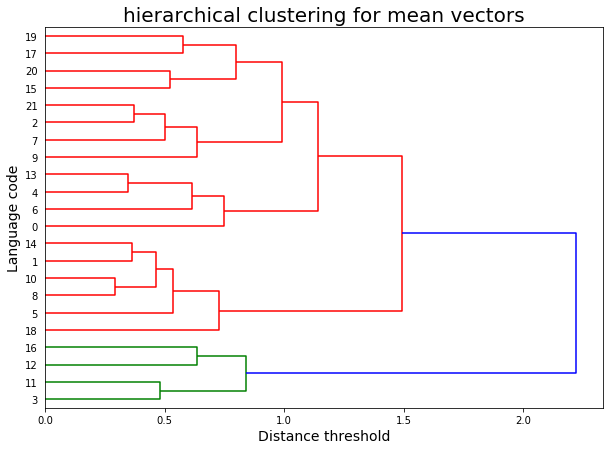

In [12]:
import scipy.cluster.hierarchy as shc

def iaml01cw2_q3_3():
#     get mean vector
    trn_final = np.column_stack((Xtrn,Ytrn))
    df_trn = pd.DataFrame(trn_final)
    
    lst=[]
    mean_vec=[]
    for i in range(0,22):
        lst.append(df_trn[df_trn[df_trn.columns[-1]]==i].drop([26],axis=1).values)
        mean_vec.append(lst[i].mean(axis=0))
    
    mean_arr = np.array(mean_vec)
    
#     plot trees
    tree = shc.linkage(mean_arr, method='ward')
    fig=plt.figure(figsize=(10, 7))
    dend = shc.dendrogram(tree,orientation='right')
    
    plt.title('hierarchical clustering for mean vectors',fontsize='20')
    plt.xlabel('Distance threshold',fontsize=14)
    plt.ylabel('Language code',fontsize=14)
    plt.show()
    fig.savefig('./results/q3_3.img.png',dpi = 72)

iaml01cw2_q3_3()  

In [13]:
mean_arr.shape

(22, 26)

Discuss your findings:

<br>

<b>3.4 (5 points)</b><br> 
We here extend the hierarchical clustering done in Question 3.3 by using multiple samples from each language.
To that end, apply k-means clustering with the parameters n_clusters=3 and random_state=1 to the training data for each language to find 3 cluster centres, which will result in
3 × 22 = 66 vectors in total.
Carry out hierarchical clustering with each of the linkage methods, ’ward’, ’single’, and ’complete’ on the 66 vectors.
Plot a dendrogram for each method, and discuss the results briefly.

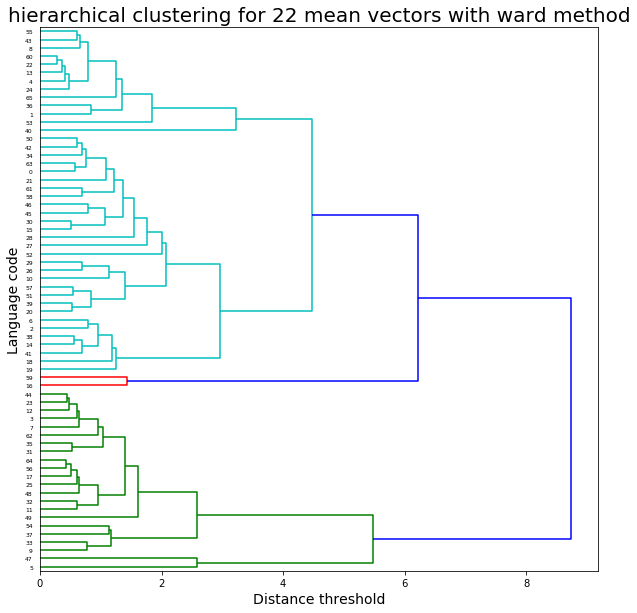

In [79]:
def iaml01cw2_q3_4():
#     get data
    lst=[]
    for i in range(0,22):
        lst.append(df_trn[df_trn[df_trn.columns[-1]]==i].drop([26],axis=1).values)
        
        X_kms = np.array(lst)
    
    kms_3=[]
    for i in range(22):
        kms_3.append(KMeans(n_clusters=3, random_state=1).fit(X_kms[i]).cluster_centers_)
    
    kms=np.array(kms_3).reshape(66,26)
    
#     train the model
    tree = shc.linkage(kms, method='ward')
    fig=plt.figure(figsize=(10, 10))
    dend = shc.dendrogram(tree,orientation='right')
    
#     plot
    plt.title('hierarchical clustering for 22 mean vectors with ward method',fontsize='20')
    plt.xlabel('Distance threshold',fontsize=14)
    plt.ylabel('Language code',fontsize=14)
    plt.show()
    fig.savefig('./results/q3_4.img.png')

iaml01cw2_q3_4()

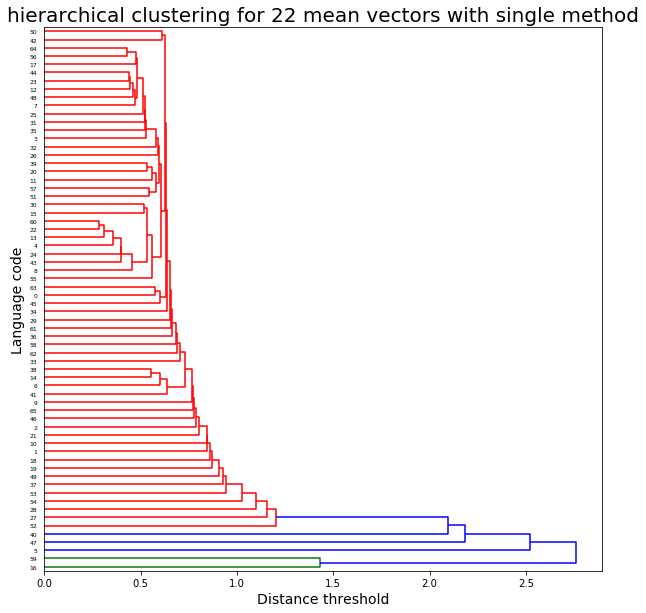

In [80]:
def iaml01cw2_q3_42():
#     get data
    lst=[]
    for i in range(0,22):
        lst.append(df_trn[df_trn[df_trn.columns[-1]]==i].drop([26],axis=1).values)
        
        X_kms = np.array(lst)
    
    kms_3=[]
    for i in range(22):
        kms_3.append(KMeans(n_clusters=3, random_state=1).fit(X_kms[i]).cluster_centers_)
    
    kms=np.array(kms_3).reshape(66,26)
    
#     train the model
    tree = shc.linkage(kms, method='single')
    fig=plt.figure(figsize=(10, 10))
    dend = shc.dendrogram(tree,orientation='right')
    
#     plot
    plt.title('hierarchical clustering for 22 mean vectors with single method',fontsize='20')
    plt.xlabel('Distance threshold',fontsize=14)
    plt.ylabel('Language code',fontsize=14)
    plt.show()
    fig.savefig('./results/q3_42.img.png')

iaml01cw2_q3_42()

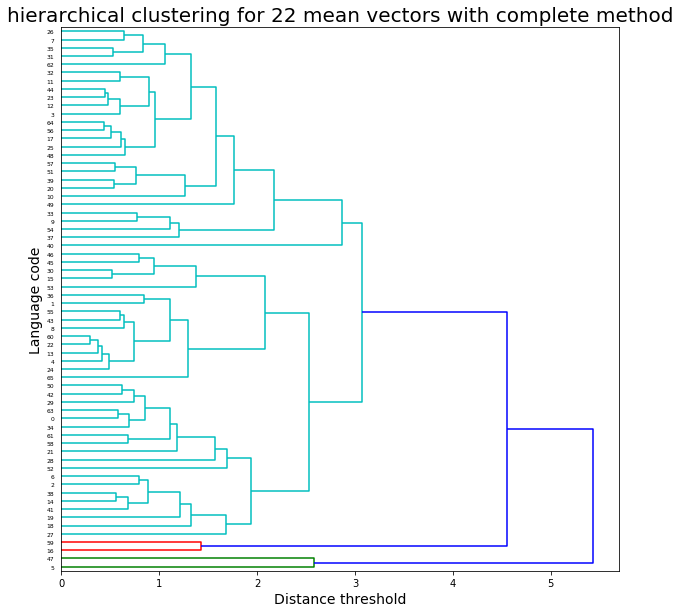

In [81]:
def iaml01cw2_q3_43():
#     get data
    lst=[]
    for i in range(0,22):
        lst.append(df_trn[df_trn[df_trn.columns[-1]]==i].drop([26],axis=1).values)
        
        X_kms = np.array(lst)
    
    kms_3=[]
    for i in range(22):
        kms_3.append(KMeans(n_clusters=3, random_state=1).fit(X_kms[i]).cluster_centers_)
    
    kms=np.array(kms_3).reshape(66,26)
    
#     train the model
    tree = shc.linkage(kms, method='complete')
    fig=plt.figure(figsize=(10, 10))
    dend = shc.dendrogram(tree,orientation='right')
    
#     plot
    plt.title('hierarchical clustering for 22 mean vectors with complete method',fontsize='20')
    plt.xlabel('Distance threshold',fontsize=14)
    plt.ylabel('Language code',fontsize=14)
    plt.show()
    fig.savefig('./results/q3_43.img.png')

iaml01cw2_q3_43()

<br>dicuss the result briefly

<br>
<b>3.5 (6 points) </b> <br>
We now consider Gaussian mixture model (GMM), whose probability distri- bution function (pdf) is given as a linear combination of Gaussian or normal distributions, i.e.,
K
p(x) = 􏰃 pkN(x|μk, Σk).
k=1
where N(x|μk,Σk) is a Gaussian distribution of x for k-th component with the mean
vector μk = (μk1, . . . , μkD) and covariance matrix Σk = (σ(k)), pk is the weight for k- ij
th distribution or component such that 􏰂Kk=1 pk = 1, and K is the number of mixture components. N(x|μk,Σk) is given as
1 􏰀1 −1 T􏰁 N(x|μk,Σk)= D/2 1/2 exp − (x−μk)Σk (x−μk) .
The covariance matrix Σ is a D-by-D symmetric matrix, whose (i,j) element, σij, is the covariance between variables xi and xj. If the number of training samples is not as sufficiently large as D, Σ becomes singular and non-invertible, which makes it impossible to calculate the pdf. Naive Bayes is one of the techniques to mitigate the problem, inwhich you assume conditional independence among variables x. As a result, the covariance σij = 0 for i ̸= j, meaning all non-diagonal elements of Σ are zeros and only the diagonal elements can be non zeros. Such a covariance matrix is referred to as “diagonal-covariance matrix” as opposed to “full-covariance matrix” that does not use the assumption.
We now employ Gaussian Mixture Model (GMM) in sklearn to model the data for a language.
Using the data for Language 0 only, for each type of covariance matrix, ’diagonal covari- ance’ and ’full covariance’, and for each number of mixture components, K = 1, 3, 5, 10, 15, train a GMM on the training data, and obtain the per-sample average log-likelihood on the training data and test data for Language 0.
Report the result in a single graph and a table, and discuss your findings.

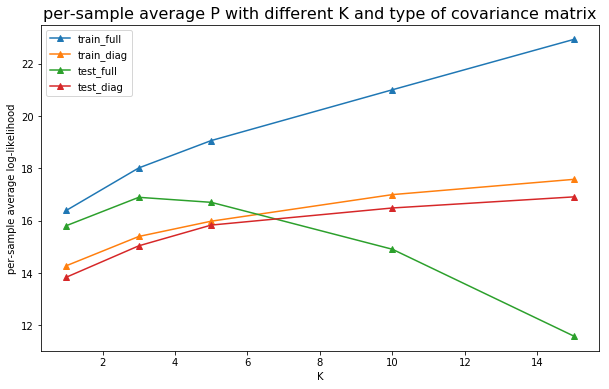

full train: [16.394 18.016 19.061 21.001 22.922]
diag train: [14.28  15.398 15.982 16.997 17.579]
full test: [15.811 16.894 16.702 14.91  11.598]
diag test: [13.843 15.041 15.833 16.487 16.91 ]


In [24]:
from sklearn import mixture
def iaml01cw2_q3_5():
    # generate training data for language 0
    xtrain_0=df_trn[df_trn[df_trn.columns[-1]]==0].drop([26],axis=1).values
    
    # generate testing data for language 0
    tst_final = np.column_stack((Xtst,Ytst))
    df_tst = pd.DataFrame(tst_final)
    xtst_0=df_tst[df_tst[df_tst.columns[-1]]==0].drop([26],axis=1).values
    
    # employ GMM to model the data for langugage 0
    
    score_train=[]
    score_test=[]
    ctype=['full','diag']
    K=[1,3,5,10,15]
    
    for c in range(2):
        for k in range(5):
            gmmf = mixture.GaussianMixture(n_components=K[k]
                                           ,covariance_type=ctype[c]).fit(xtrain_0)
            score_train.append(gmmf.score(xtrain_0))
            score_test.append(gmmf.score(xtst_0))   
    
    # # plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(K,score_train[:5],label='train_full',marker='^')
    ax.plot(K,score_train[5:],label='train_diag',marker='^')
    ax.plot(K,score_test[:5],label='test_full',marker='^')
    ax.plot(K,score_test[5:],label='test_diag',marker='^')
    ax.set_title('per-sample average P with different K and type of covariance matrix',
                fontsize='16')
    ax.set_xlabel('K')
    ax.set_ylabel('per-sample average log-likelihood')
    ax.legend()
    plt.show()
    fig.savefig('./results/q3_5.img.png')
    
    print('full train:',np.around(score_train[:5],decimals=3))
    print('diag train:',np.around(score_train[5:],decimals=3))
    print('full test:',np.around(score_test[:5],decimals=3))
    print('diag test:',np.around(score_test[5:],decimals=3))
iaml01cw2_q3_5()

discuss your findings

<b>discuss your findings<b>

<br>
<b>3.6 (5 points)</b><br> The training of GMM employs the Expectation-Maximisation (EM) algorithm, which incrementally optimises model parameters - mean vectors, covariance matrices, and component weights,
Here were are interested in how effective the optimisation is compared to a simple Gaus- sian mixture model that does not use the EM, but it finds the mean vector and covariance matrix of Gaussian distribution for each class based on the k-means clustering, and es- timates the weights of mixture components based on the number of samples assigned to each cluster.
Write code for the following two functions for this simple Gaussian mixture model, and show the code in your report. For simplicity, use diagonal covariance instead of full covariance. Note that we fit a Gaussian distribution to the samples assigned to each cluster, using the maximum likelihood parameter estimation. Use the parameter random_state=1 when you use k-means clustering. For a multivariate Gaussian distribu- tion, use scipy.stats.multivariate_normal.<br><br>
SimpleGMM_train(X, n_components) :
Estimate model parameters from samples in X, and return mean vectors (ndarray, shape (n_components, n_features)), a vector of diagonal ele- ments of covariance matrix (ndarray, shape (n_components, n_features)), and weights of mixture components (ndarray, shape (n_components,)).
<br><br>
SimpleGMM_eval(X, Ms, Dcovs, Pk) :
Compute the log-likelihood of each sample in X, and return the log- likelihoods in an ndarray (shape (n_samples,)). Ms, Dcovs, and Pk corre- spond to the return values of SimpleGMM_train().

In [25]:
def iaml01cw2_q3_6():
    def SimpleGMM_train1(X, n_components):
        kmeans = KMeans(n_clusters=n_components,random_state=1).fit(X)
        y_preds = kmeans.fit_predict(X)

        Ms = kmeans.cluster_centers_

        #   row: n_component, col: X.shape[1]
        Dcovs = np.zeros((n_components,X.shape[1]))
        for i in range(n_components):
            cov_matrics = np.cov(X[y_preds==i],rowvar=False)
            Dcovs[i] = np.diagonal(cov_matrics)

        #     get weight
        tem = np.zeros(n_components)
        for label in kmeans.labels_:
            tem[label]+=1
        Pk = tem/X.shape[0]

        return Ms,Dcovs,Pk

    def SimpleGMM_eval(X,Ms,Dcovs,Pk):
        n_components =Ms.shape[0]
        n_samples = X.shape[0]
        log_likelihoods = np.zeros(n_samples)
        for i in range(n_samples):
            like = 0
            for j in range(n_components):
                mn = multivariance_normal(mean=Ms[j],
                                          cov=Dovs[j],
                                          random_state=1)
                like += (mn.pdf(X[i]) * Pk[j])
            log_likelihoods[i] = np.log(like)
        return log_likelihoods
iaml01cw2_q3_6()

<b>3.7 (3 points) </b> <br> Now train the SimpleGMM on the training set for Language 0, and report the weights of mixture components for each K = 1, 5, 10.

In [26]:
def iaml01cw2_q3_7():   
    def SimpleGMM_train(X, n_components):
        kmeans = KMeans(n_clusters=n_components,random_state=1).fit(X)
        y_preds = kmeans.fit_predict(X)

        Ms = kmeans.cluster_centers_

        #   row: n_component, col: X.shape[1]
        Dcovs = np.zeros((n_components,X.shape[1]))
        for i in range(n_components):
            cov_matrics = np.cov(X[y_preds==i],rowvar=False)
            Dcovs[i] = np.diagonal(cov_matrics)

        #     get weight
        tem = np.zeros(n_components)
        for label in kmeans.labels_:
            tem[label]+=1
        Pk = tem/X.shape[0]

        return Ms,Dcovs,Pk
    
#     get datasample
    df_trn = pd.DataFrame(np.column_stack((Xtrn,Ytrn)))
    languageSample = df_trn[df_trn[df_trn.columns[-1]]==0].drop([26],axis=1)
    
#     get result
    K=[1,5,10]
    for k in K:
        weight = SimpleGMM_train(languageSample,k)[2]
        print('K={}:'.format(k))
        print(list(map('{:.3f}'.format,weight)))

iaml01cw2_q3_7()

K=1:
['1.000']
K=5:
['0.151', '0.287', '0.249', '0.181', '0.133']
K=10:
['0.090', '0.113', '0.065', '0.100', '0.143', '0.071', '0.102', '0.071', '0.114', '0.132']


<b>3.8 (4 points) </b> <br>
Using the data for Language 0 and using the SimpleGMM you obtained in Question 3.7, report, in a table, per-sample average log-likelihood on the training data and test data for K = 1,3,5,10,15.
Discuss the results you obtained, comparing with those obtained in Question 3.5.

In [67]:
def iaml01cw2_q3_8(): 
    def SimpleGMM_train(X, n_components):
        kmeans = KMeans(n_clusters=n_components,random_state=1).fit(X)
        y_preds = kmeans.fit_predict(X)

        Ms = kmeans.cluster_centers_

        #   row: n_component, col: X.shape[1]
        Dcovs = np.zeros((n_components,X.shape[1]))
        for i in range(n_components):
            cov_matrics = np.cov(X[y_preds==i],rowvar=False)
            Dcovs[i] = np.diagonal(cov_matrics)

        #     get weight
        tem = np.zeros(n_components)
        for label in kmeans.labels_:
            tem[label]+=1
        Pk = tem/X.shape[0]

        return Ms,Dcovs,Pk

    def SimpleGMM_eval(X,Ms,Dcovs,Pk):
        n_components =Ms.shape[0]
        n_samples = X.shape[0]
        log_likelihoods = np.zeros(n_samples)
        for i in range(n_samples):
            like = 0
            for j in range(n_components):
                mn = multivariate_normal(mean=Ms[j],
                                          cov=Dcovs[j])
                like += (mn.pdf(X[i]) * Pk[j])
            log_likelihoods[i] = np.log(like)
        return log_likelihoods
    
#     get training data:
    df_trn = pd.DataFrame(np.column_stack((Xtrn,Ytrn)))
    trnSample = df_trn[df_trn[df_trn.columns[-1]]==0].drop([26],axis=1)
    
#     get testing data
    df_tst = pd.DataFrame(np.column_stack((Xtst,Ytst)))
    tstSample = df_tst[df_tst[df_tst.columns[-1]]==0].drop([26],axis=1)
    
    K = [1,3,5,10,15]
    
    
    for k in K:
        Ms, Dcovs,PK = SimpleGMM_train(trnSample,k)
        SimpleGMM_eval(trnSample,Ms,Dcovs,PK)
    
    
iaml01cw2_q3_8()